<a href="https://colab.research.google.com/github/feliperost/cineclube/blob/main/Cineclube_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()

Saving cineclube.csv to cineclube (1).csv


In [44]:
import io

# importando o arquivo e determinando que as vírgulas são decimais, transformando as notas em valores numéricos
df = pd.read_csv(io.BytesIO(uploaded['cineclube (1).csv']), decimal=',')

print(df)

                     Filme  tadolfo  rost  mendonsa  xaubiro  cambe  stefano  \
0         Badlands - 13/05      7.5   8.0      7.50      2.0    7.5      7.0   
1         Prova_dOrchestra      6.5   7.0      7.25     10.0    4.0      6.0   
2   Brutti_Sporchi_Cattivi      6.5   4.5      7.50      5.0    7.0      7.3   
3                   Trafic      7.5   9.0      7.00      8.0    4.0      5.0   
4               Tilsammans      8.5   7.0      7.00      6.0    8.0      9.0   
..                     ...      ...   ...       ...      ...    ...      ...   
61          AMulherDeTodos      NaN   7.0       NaN      NaN    NaN      NaN   
62       OLoboAtrasDaPorta      NaN   7.0      7.00      NaN    NaN      NaN   
63        MedidaProvisória      6.0   6.0      5.00      NaN    NaN      NaN   
64       TriangleOfSadness      6.5   7.5      7.80      NaN    NaN      6.5   
65                   Hausu      NaN   9.0      8.00      NaN    NaN      8.0   

    tazima  freitas  duba  média do fil

In [45]:
df.head()

,Filme,tadolfo,rost,mendonsa,xaubiro,cambe,stefano,tazima,freitas,duba,média do filme
0,Badlands - 13/05,7.5,8.0,7.50,2.0,7.5,7.0,7.7,NaN,NaN,6.7
1,Prova_dOrchestra,6.5,7.0,7.25,10.0,4.0,6.0,5.0,9.0,4.0,6.5
2,Brutti_Sporchi_Cattivi,6.5,4.5,7.50,5.0,7.0,7.3,2.0,6.0,4.0,5.5
3,Trafic,7.5,9.0,7.00,8.0,4.0,5.0,7.5,NaN,NaN,6.9
4,Tilsammans,8.5,7.0,7.00,6.0,8.0,9.0,8.0,9.0,4.0,7.4


In [46]:
# nota média dada por rost
media_rost = df['rost'].mean()

print(media_rost)

6.652272727272727


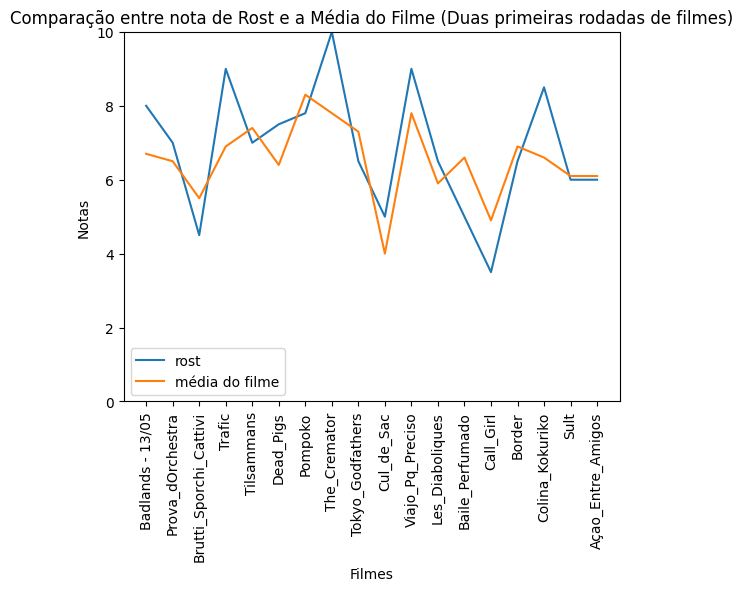

In [47]:
%matplotlib inline

# Comparando as notas dadas por Rost à nota média recebida pelos filmes das duas primeiras rodadas

df_sliced = df[:18] # Limitando o dataframe aos 18 primeiros resultados (2 primeiras rodadas, 9 filmes por rodada)

df_sliced.plot(x="Filme", y=["rost", "média do filme"])
plt.title("Comparação entre nota de Rost e a Média do Filme (Duas primeiras rodadas de filmes)")
plt.xlabel("Filmes")
plt.ylabel("Notas")
plt.xticks(rotation=90) # rotaciona a descrição do eixo x, para melhor visualização
plt.ylim(0, 10) # configura o eixo y para mostrar valores de 0 a 10 (range possível de notas)
plt.xticks(range(len(df_sliced)), df_sliced["Filme"])
plt.legend(loc='lower left') # ajustando a posição da legenda

plt.show()




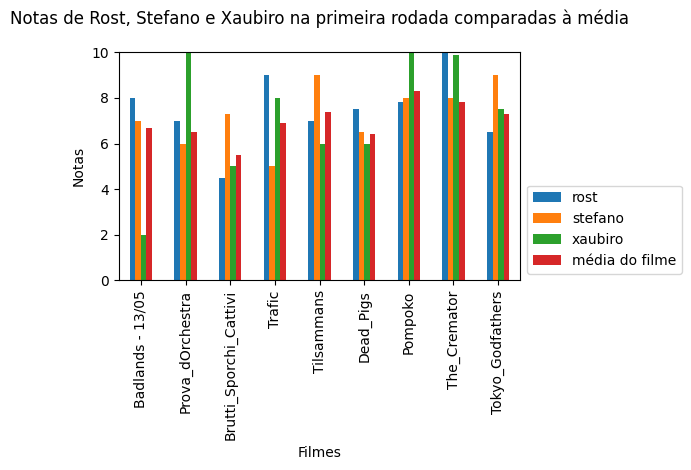

In [55]:
df_sliced = df[:9]

df_sliced.plot.bar(x="Filme", y=["rost", "stefano", "xaubiro", "média do filme"])
plt.title("Notas de Rost, Stefano e Xaubiro na primeira rodada comparadas à média", pad=20)
plt.xlabel("Filmes")
plt.ylabel("Notas")
plt.xticks(rotation=90) # rotaciona a descrição do eixo x, para melhor visualização
plt.ylim(0, 10) # configura o eixo y para mostrar valores de 0 a 10 (range possível de notas)
plt.xticks(range(len(df_sliced)), df_sliced["Filme"])
plt.legend(loc='lower left', bbox_to_anchor=(1, 0)) # ajustando a posição da legenda para fora do gráfico

plt.tight_layout()
plt.show()